# Simple sine regression model

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Generate sample data for training

In [3]:
seed = 0
SAMPLES = 1000
np.random.seed(seed)
tf.random.set_seed(seed)

x_values = np.random.uniform(low=0, high=2*np.pi, size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)

#### Plot x and y

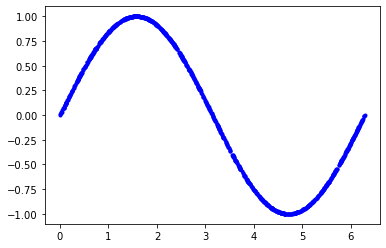

In [4]:
plt.plot(x_values, y_values, 'b.')
plt.show()

In [5]:
y_values += 0.1 * np.random.randn(*y_values.shape)

#### Plot x and y with random noise

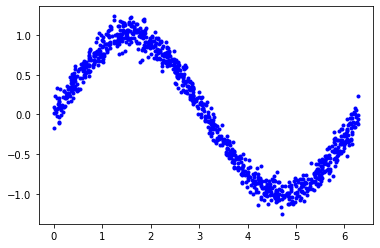

In [6]:
plt.plot(x_values, y_values, 'b.')
plt.show()

#### Split the dataset
0.8, 0.1, 0.1 for training, val, test

In [7]:
TRAIN_SPLIT = int(0.8 * SAMPLES)
TEST_SPLIT = int(0.1 * SAMPLES + TRAIN_SPLIT)

x_train, x_val, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_val, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

#### Plot the separate dataset

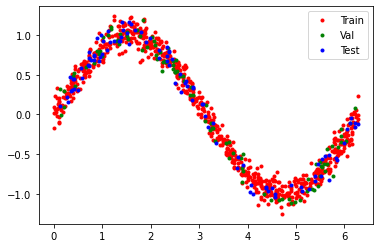

In [8]:
plt.plot(x_train, y_train, 'r.', label='Train')
plt.plot(x_val, y_val, 'g.', label='Val')
plt.plot(x_test, y_test, 'b.', label='Test')
plt.legend()
plt.show()

### Define the model

In [9]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(1,)))
model_1.add(tf.keras.layers.Dense(units=1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [10]:
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/500
50/50 [==============================] - 1s 9ms/step - loss: 2.6698 - mae: 1.3077 - val_loss: 1.4520 - val_mae: 1.0031
Epoch 2/500
50/50 [==============================] - 0s 4ms/step - loss: 1.0677 - mae: 0.9167 - val_loss: 0.7117 - val_mae: 0.7791
Epoch 3/500
50/50 [==============================] - 0s 4ms/step - loss: 0.5826 - mae: 0.6786 - val_loss: 0.5506 - val_mae: 0.6413
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4732 - mae: 0.5899 - val_loss: 0.4855 - val_mae: 0.5989
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4209 - mae: 0.5549 - val_loss: 0.4296 - val_mae: 0.5647
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 0.3761 - mae: 0.5242 - val_loss: 0.3788 - val_mae: 0.5327
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 0.3357 - mae: 0.4973 - val_loss: 0.3416 - val_mae: 0.5031
Epoch 8/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3008 - m

#### Graph the loss and acc of simple sine model

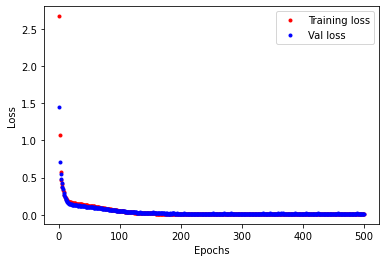

In [11]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

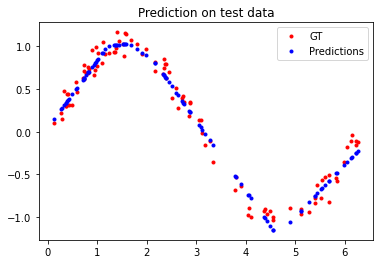

In [12]:
predictions = model_1.predict(x_test)

plt.title('Prediction on test data')
plt.plot(x_test, y_test, 'r.', label='GT')
plt.plot(x_test, predictions, 'b.', label='Predictions')
plt.legend()
plt.show()

In [13]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(1,)))
model_2.add(tf.keras.layers.Dense(units=16, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_2 = model_2.fit(x_train, y_train, epochs=500, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/500
50/50 [==============================] - 1s 6ms/step - loss: 0.3991 - mae: 0.5426 - val_loss: 0.3947 - val_mae: 0.5394
Epoch 2/500
50/50 [==============================] - 0s 2ms/step - loss: 0.3246 - mae: 0.4919 - val_loss: 0.3056 - val_mae: 0.4810
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 0.2638 - mae: 0.4476 - val_loss: 0.2501 - val_mae: 0.4321
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2213 - mae: 0.4116 - val_loss: 0.1975 - val_mae: 0.3893
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1930 - mae: 0.3845 - val_loss: 0.1667 - val_mae: 0.3571
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1733 - mae: 0.3634 - val_loss: 0.1470 - val_mae: 0.3302
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1622 - mae: 0.3476 - val_loss: 0.1507 - val_mae: 0.3326
Epoch 8/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1523 - m

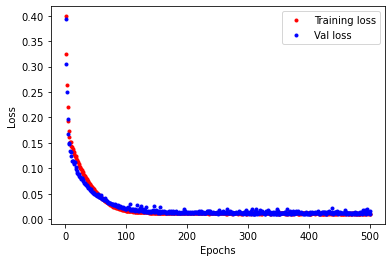

In [15]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

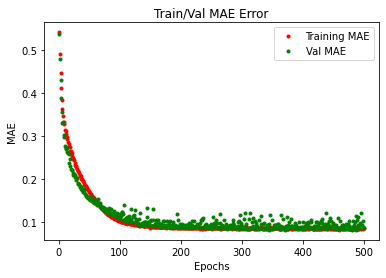

In [18]:
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs, mae, 'r.', label='Training MAE')
plt.plot(epochs, val_mae, 'g.', label='Val MAE')
plt.title('Train/Val MAE Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

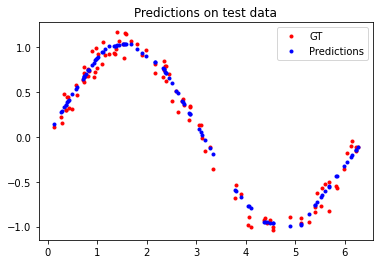

In [20]:
predictions = model_2.predict(x_test)

plt.plot(x_test, y_test, 'r.', label='GT')
plt.plot(x_test, predictions, 'b.', label='Predictions')
plt.title('Predictions on test data')
plt.legend()
plt.show()

### Convert the simple sine model to TF Lite model
- **TF Lite Converter** \
Converts the TF model to proper *FlatBuffer* format for edge devices.
- **TF Lite Interpreter** \
Implements the converted model using the most efficient operation for the device.

##### Converts to TF Lite model **without** quantization

In [23]:
# Converts the simple sine model to TF Lite model w/o quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Saves the model to the disk
open('simple_sine_model.tflite', 'wb').write(tflite_model)

# Converts the model with quantization

# Implements the default optimization including quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Sets the representative dataset
# For estimation to [min, max] range of inputs/activations for quantization
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator

tflite_model = converter.convert()

open('simple_sine_model_quantized.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\gjk6626\AppData\Local\Temp\tmpoon_m76t\assets


INFO:tensorflow:Assets written to: C:\Users\gjk6626\AppData\Local\Temp\tmpoon_m76t\assets


INFO:tensorflow:Assets written to: C:\Users\gjk6626\AppData\Local\Temp\tmp2dszsneb\assets


INFO:tensorflow:Assets written to: C:\Users\gjk6626\AppData\Local\Temp\tmp2dszsneb\assets
C:\Users\gjk6626\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2752

##### Evaluate the converted models and validate their accuracy
- Needs more complicated processes because of efficiency 
    1. Define the interpreter for implementation
    2. Allocate the model to the memory
    3. Add inputs to the input tensor
    4. Call the model
    5. Add outputs to the output tensor

In [25]:
# 1.
simple_sine_model = tf.lite.Interpreter('simple_sine_model.tflite')
simple_sine_model_quantized = tf.lite.Interpreter('simple_sine_model_quantized.tflite')

# 2.
simple_sine_model.allocate_tensors()
simple_sine_model_quantized.allocate_tensors()

simple_sine_model_input_index = simple_sine_model.get_input_details()[0]['index']
simple_sine_model_output_index = simple_sine_model.get_output_details()[0]['index']
simple_sine_model_quantized_input_index = simple_sine_model_quantized.get_input_details()[0]['index']
simple_sine_model_quantized_output_index = simple_sine_model_quantized.get_output_details()[0]['index']

simple_sine_model_predictions = []
simple_sine_model_quantized_predictions = []

for x_value in x_test:
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
    # 3.
    simple_sine_model.set_tensor(simple_sine_model_input_index, x_value_tensor)
    # 4.
    simple_sine_model.invoke()
    # 5.
    simple_sine_model_predictions.append(simple_sine_model.get_tensor(simple_sine_model_output_index)[0])

    simple_sine_model_quantized.set_tensor(simple_sine_model_quantized_input_index, x_value_tensor)
    simple_sine_model_quantized.invoke()
    simple_sine_model_quantized_predictions.append(simple_sine_model_quantized.get_tensor(simple_sine_model_quantized_output_index)[0])

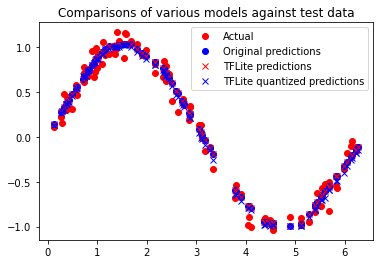

In [27]:
plt.clf()
plt.title('Comparisons of various models against test data')
plt.plot(x_test, y_test, 'ro', label='Actual')
plt.plot(x_test, predictions, 'bo', label='Original predictions')
plt.plot(x_test, simple_sine_model_predictions, 'rx', label='TFLite predictions')
plt.plot(x_test, simple_sine_model_quantized_predictions, 'bx', label='TFLite quantized predictions')
plt.legend()
plt.show()

#### Compare the model size

In [29]:
import os
tflite_model_size = os.path.getsize('simple_sine_model.tflite')
tflite_quantized_model_size = os.path.getsize('simple_sine_model_quantized.tflite')
print('Original model size is %d bytes.' % tflite_model_size)
print('Quantized model size is %d bytes.' % tflite_quantized_model_size)


Original model size is 2932 bytes.
Quantized model size is 2752 bytes.


### Convert the TF Lite model to C file